### André Callil
### PriceHubble Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import os
import shutil
import matplotlib.pyplot as plt


### Data Cleaning & Exploration

In [2]:
df = pd.read_csv('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/imgs_kitchen_bathroom.csv')


In [3]:
df.head()


offer_id  \
0  b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...   
1  b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...   
2  77514404db0d645f607c928b59188d2ad6a615ba2118dd...   
3  77514404db0d645f607c928b59188d2ad6a615ba2118dd...   
4  bacdfaea1480adbed3a54505e3eefdd87f91300565852a...   

                                           image_uri  is_bathroom  is_kitchen  
0       b6bfdb5a67ebc75b3fe8610f3e28e8e5d9644d6f.jpg        False        True  
1       17933fb4be872590c54b2a41024bbae3e4adc858.jpg         True       False  
2  homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...         True       False  
3  homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...         True       False  
4       fe973a0b2612a55a331558d3f8d1ffa676becb9e.jpg         True       False

In [4]:
df.isnull().sum()


offer_id       0
image_uri      0
is_bathroom    0
is_kitchen     0
dtype: int64

In [5]:
len(df)


15560

In [6]:
# Images labeled as both bathroom and kitchen
true_df = df[((df['is_bathroom'] == True) & (df['is_kitchen'] == True))]
len(true_df)


21

In [7]:
# Images labeled as none bathroom nor kitchen
false_df = df[((df['is_bathroom'] == False) & (df['is_kitchen'] == False))]
len(false_df)


0

In [8]:
# Drop image label duplicates
df = df.drop_duplicates(subset=['image_uri'])
len(df)


15493

In [9]:
# Drop images labeled as both bathroom and kitchen
df = df.drop(true_df.index.tolist())
len(df)


15472

In [10]:
df.describe()


offer_id  \
count                                               15472   
unique                                               7500   
top     2374ad24e384f22ce772b43d91daa90fbeffe04e87bf2d...   
freq                                                    6   

                                                image_uri is_bathroom  \
count                                               15472       15472   
unique                                              15472           2   
top     immoscout_e8501766379a6d29047807f73f96999b0d07...        True   
freq                                                    1        9033   

       is_kitchen  
count       15472  
unique          2  
top         False  
freq         9033

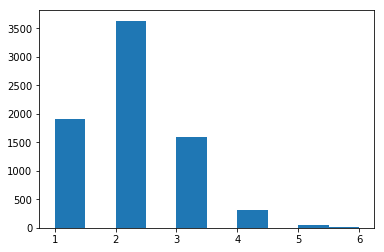

In [11]:
# Amount of pictures per apartment ranges from 1 to 6
plt.hist(df['offer_id'].value_counts())
None


In [12]:
# Creating a df with only bathroom pictures
df_baths = df.loc[df['is_bathroom'] == True]
df_baths.describe()


offer_id  \
count                                                9033   
unique                                               6628   
top     2374ad24e384f22ce772b43d91daa90fbeffe04e87bf2d...   
freq                                                    5   

                                                image_uri is_bathroom  \
count                                                9033        9033   
unique                                               9033           1   
top     immoscout_e8501766379a6d29047807f73f96999b0d07...        True   
freq                                                    1        9033   

       is_kitchen  
count        9033  
unique          1  
top         False  
freq         9033

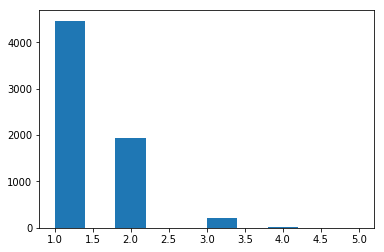

In [13]:
# Amount of bathroom pictures per apartments
baths_hist = df_baths['offer_id'].value_counts()
plt.hist(baths_hist)
None


In [14]:
# Creating a df with only kitchen pictures
df_kits = df.loc[df['is_kitchen'] == True]
df_kits.describe()


offer_id  \
count                                                6439   
unique                                               5708   
top     3fc805233b7cf112e25a3bcac3e4c6265c0d34d5ff886b...   
freq                                                    3   

                                                image_uri is_bathroom  \
count                                                6439        6439   
unique                                               6439           1   
top     homegateOnline_0caa3ed37368359ebce4b41c2c4b980...       False   
freq                                                    1        6439   

       is_kitchen  
count        6439  
unique          1  
top          True  
freq         6439

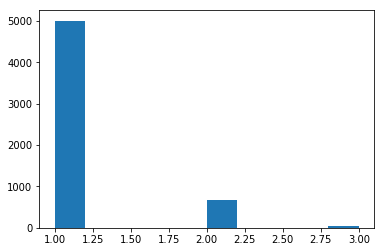

In [15]:
# Amount of kitchen pictures per apartments
kits_hist = df_kits['offer_id'].value_counts()
plt.hist(kits_hist)
None


In [16]:
df = df.reset_index()


### Separating pictures into baths and kits folders

In [18]:
base = './Data/data/annotations_dated/20190706'

for i in range(df.shape[0]):
    if os.path.isfile(os.path.join(base, 'imgs_kitchen_bathroom', df['image_uri'][i])): 
        if df['is_bathroom'][i]:
            shutil.move(os.path.join(base, 'imgs_kitchen_bathroom', df['image_uri'][i]),
                       os.path.join(base, 'room-type', 'bath', df['image_uri'][i]))
        if df['is_kitchen'][i]:
            shutil.move(os.path.join(base, 'imgs_kitchen_bathroom', df['image_uri'][i]),
                       os.path.join(base, 'room-type', 'kit', df['image_uri'][i]))


"base = './Data/data/annotations_dated/20190706'\n\nfor i in range(df.shape[0]):\n    if os.path.isfile(os.path.join(base, 'imgs_kitchen_bathroom', df['image_uri'][i])): \n        if df['is_bathroom'][i]:\n            shutil.move(os.path.join(base, 'imgs_kitchen_bathroom', df['image_uri'][i]),\n                       os.path.join(base, 'room-type', 'bath', df['image_uri'][i]))\n        if df['is_kitchen'][i]:\n            shutil.move(os.path.join(base, 'imgs_kitchen_bathroom', df['image_uri'][i]),\n                       os.path.join(base, 'room-type', 'kit', df['image_uri'][i]))"

In [19]:
df.head()

index                                           offer_id  \
0      0  b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...   
1      1  b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...   
2      2  77514404db0d645f607c928b59188d2ad6a615ba2118dd...   
3      3  77514404db0d645f607c928b59188d2ad6a615ba2118dd...   
4      4  bacdfaea1480adbed3a54505e3eefdd87f91300565852a...   

                                           image_uri  is_bathroom  is_kitchen  
0       b6bfdb5a67ebc75b3fe8610f3e28e8e5d9644d6f.jpg        False        True  
1       17933fb4be872590c54b2a41024bbae3e4adc858.jpg         True       False  
2  homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...         True       False  
3  homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...         True       False  
4       fe973a0b2612a55a331558d3f8d1ffa676becb9e.jpg         True       False

### Adding classification to dataframe

In [20]:
df["class"] = ""


In [21]:
df.head()


index                                           offer_id  \
0      0  b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...   
1      1  b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...   
2      2  77514404db0d645f607c928b59188d2ad6a615ba2118dd...   
3      3  77514404db0d645f607c928b59188d2ad6a615ba2118dd...   
4      4  bacdfaea1480adbed3a54505e3eefdd87f91300565852a...   

                                           image_uri  is_bathroom  is_kitchen  \
0       b6bfdb5a67ebc75b3fe8610f3e28e8e5d9644d6f.jpg        False        True   
1       17933fb4be872590c54b2a41024bbae3e4adc858.jpg         True       False   
2  homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...         True       False   
3  homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...         True       False   
4       fe973a0b2612a55a331558d3f8d1ffa676becb9e.jpg         True       False   

  class  
0        
1        
2        
3        
4

### Labeling pictures according to its classification

In [22]:
top_bath = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/classification/baths/top-baths')

for file in top_bath:
    df['class'].loc[df['image_uri'] == file] = 1


/Users/acallil/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
normal_bath = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/classification/baths/normal-baths')

for file in normal_bath:
    df['class'].loc[df['image_uri'] == file] = 2
    

In [24]:
simple_bath = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/classification/baths/simple-baths')

for file in simple_bath:
    df['class'].loc[df['image_uri'] == file] = 3


In [25]:
top_kit = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/classification/kits/top-kits')

for file in top_kit:
    df['class'].loc[df['image_uri'] == file] = 1
    

In [26]:
normal_kit = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/classification/kits/normal-kits')

for file in normal_kit:
    df['class'].loc[df['image_uri'] == file] = 2
    

In [27]:
simple_kit = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/classification/kits/simple-kits')

for file in simple_kit:
    df['class'].loc[df['image_uri'] == file] = 3
    

In [28]:
df_baths = df[df['is_bathroom']==True]
df_baths = df_baths.reset_index(drop=True)
df_baths.head()


index                                           offer_id  \
0      1  b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...   
1      2  77514404db0d645f607c928b59188d2ad6a615ba2118dd...   
2      3  77514404db0d645f607c928b59188d2ad6a615ba2118dd...   
3      4  bacdfaea1480adbed3a54505e3eefdd87f91300565852a...   
4      6  00bd7a80b42815726d208786050e4212303f2ec6c30717...   

                                           image_uri  is_bathroom  is_kitchen  \
0       17933fb4be872590c54b2a41024bbae3e4adc858.jpg         True       False   
1  homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...         True       False   
2  homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...         True       False   
3       fe973a0b2612a55a331558d3f8d1ffa676becb9e.jpg         True       False   
4  immoscout_8a33fd5323c6751be285d0b0aac72d248823...         True       False   

  class  
0        
1        
2        
3        
4

In [29]:
df_baths['class'].value_counts()


     8514
2     232
1     151
3     136
Name: class, dtype: int64

In [30]:
df_kits = df[df['is_kitchen']==True]
df_kits = df_kits.reset_index(drop=True)
df_kits.head()


index                                           offer_id  \
0      0  b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...   
1      5  0259302e5b357c9a5f07373f1e73963abffdafcfec14cb...   
2      7  00bd7a80b42815726d208786050e4212303f2ec6c30717...   
3      8  b9881b8c4b58a1c209c61d6dcc2b31fbf8dd8e24626344...   
4     12  717e391296dce480affe430c064ed7ae8d66c527bc4d60...   

                                           image_uri  is_bathroom  is_kitchen  \
0       b6bfdb5a67ebc75b3fe8610f3e28e8e5d9644d6f.jpg        False        True   
1  immoscout_d45a5162b26833a3431867fe3e3f337b10b7...        False        True   
2  immoscout_8a33fd5323c6751be285d0b0aac72d248823...        False        True   
3  homegateOnline_47e2914389de3c080907b7aa4fea69a...        False        True   
4  newhome_a90ad72684e521293b391115f7643a158cc664...        False        True   

  class  
0        
1        
2        
3        
4

In [31]:
df_kits['class'].value_counts()

     5945
2     202
1     152
3     140
Name: class, dtype: int64

### Moving classified pictures into their respective folders 

In [32]:
base = '../Data/data/annotations_dated/20190706/room-type/'

for i in range(df_baths.shape[0]):
    current_file_path = os.path.join(base, 'bath', df_baths['image_uri'][i])
    if os.path.isfile(current_file_path): 
        if df_baths['class'][i] == 1:
            shutil.move(current_file_path, 
            os.path.join(base, 'classification', 'bath', 'top-bath', df_baths['image_uri'][i]))
        if df_baths['class'][i] == 2:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'bath', 'normal-bath', df_baths['image_uri'][i]))
        if df_baths['class'][i] == 3:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'bath', 'simple-bath', df_baths['image_uri'][i]))


In [34]:
base = '../Data/data/annotations_dated/20190706/room-type/'

for i in range(df_kits.shape[0]):
    current_file_path = os.path.join(base, 'kit', df_kits['image_uri'][i])
    if os.path.isfile(current_file_path):
        if df_kits['class'][i] == 1:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'kit', 'top-kit', df_kits['image_uri'][i]))
        if df_kits['class'][i] == 2:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'kit', 'normal-kit', df_kits['image_uri'][i]))
        if df_kits['class'][i] == 3:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'kit', 'simple-kit', df_kits['image_uri'][i]))
